In [1]:
#保存数据path
# result_path="./fix_rsult_group_gap.txt"
result_path="../new_result/fix_gtoup_10_result_1.txt"
mat_file_path="../matfile/surfaces/"
fmri_path="../matfile/resfmri_data/"
# structual_path="../matfile/index_fixed/structual_matrix_1/"
structual_path="../graph_file/group_10/"
functional_path="../matfile/index_fixed/functional_matrix/"
select_key="114621"
fix_index_path="../graph_file/fix_index.txt"



In [3]:

os.chdir("../")
print(os.listdir("./"))

['.fleet', '.git', '.idea', '114823_32k_orig.vtk', 'analysis', 'cal_fiber_end_face_new.py', 'dic_result', 'find_ege.py', 'find_new.py', 'fsl', 'graph_file', 'main.py', 'matfile', 'matlab', 'matlab_to_py', 'new_result', 'process.py', 'python', 'python_code', 'python_code.zip', 'requirements.txt', 'save_as_gml.py', 'sssss.py', 't.txt', 'test.ipynb', 'test.py', 'yang.ipynb']


In [2]:
# 导入数据处理所需要库
import numpy as np
import scipy.io as sio
import os
import networkx as nx
import matplotlib.pyplot as plt


from utils import *

In [ ]:


result_dic={}
for i,num in enumerate(fix_result):
    result_dic[i]=num
def get_structual_matrix_1(key,all_index):
    structual_path="../graph_file/group_10/"
    structual_matrix=np.zeros((50,50))
    edge_list=load_edge(structual_path+key+"keys.mat")
    edge_list=[(int(i[0]),int(i[1])) for i in edge_list]
    value_list=sio.loadmat(structual_path+key+"values.mat")["edge_value"][0]
    value_list=[int(i)for i in value_list]
    print(len(edge_list))
    #这里在固定Index后需要调整
    # index_to_oringin_dic,oringin_to_index_dic=get_index_dic("114621")
    i=0
    # for edge in tqdm(edge_list,desc=key):
    #     if index_to_oringin_dic[edge[0]] in all_index and index_to_oringin_dic[edge[1]] in all_index:
    #         # print("ss")
    #         index_matrix_x=all_index.index(index_to_oringin_dic[edge[0]])
    #         index_matrix_y=all_index.index(index_to_oringin_dic[edge[1]])
    #         structual_matrix[index_matrix_x,index_matrix_y]=value_list[i]
    #         structual_matrix[index_matrix_y,index_matrix_x]=value_list[i]
    #     i+=1
    for edge in tqdm(edge_list):
        structual_matrix[edge[0],edge[1]]=value_list[i]
        structual_matrix[edge[1],edge[0]]=value_list[i]
        i+=1
    return structual_matrix


In [ ]:
#3.拿到这组点，映射回原始的结构和功能矩阵，进行进一步的分析
#4.结构数 据的分析，主要针对网络属性，如介数中心度、度中心度、聚类系数等，对功能的分析，也可以通过网络属性来进行，另外一方面，
#定位这些点在大脑上所对应的不同脑区
matr=get_structual_matrix_1("114621",[])

matr

In [6]:
fix_index=[]
fix_result=[]
with open(result_path,"r") as f:
    for line in f.readlines():
        fix_result.append(int(line.strip()))



with  open(fix_index_path,"r") as f:
    for line in f:
        fix_index.append(int(line))
index_anti_dict={}

for i in range(len(fix_index)):
    index_anti_dict[fix_index[i]]=i
# print(index_anti_dict)
#映射回结构矩阵的index
def map_index(index):
    return index_anti_dict[index]
anti_index=[map_index(i) for i in fix_index]
fix_result_anti_index=[map_index(i) for i in fix_result]
fix_result_anti_index=[i-1 for i in fix_result_anti_index]
print(fix_result_anti_index[0])
fix_result_anti_index.sort()

fix_reu=[i+1 for i in fix_result_anti_index]

sio.savemat("../index_in_5000.mat",{"index_in_5000":fix_reu})

print([i+1 for i in fix_result_anti_index])
# fix_result_anti_index[3]
# fix_result_anti_index

1436
[35, 183, 419, 422, 900, 930, 942, 1031, 1053, 1072, 1107, 1152, 1172, 1240, 1248, 1373, 1437, 1478, 1491, 1501, 1870, 1886, 1906, 1949, 1960, 1967, 1980, 2256, 2462, 2519, 3072, 3572, 3605, 3630, 3715, 3755, 3769, 3777, 3796, 3815, 3827, 3836, 3847, 3848, 3854, 3869, 3903, 3904, 4596, 5094]


In [5]:
# sio.savemat("../new_result/structual_result_vtk/fix_index.mat",{"fix_indexs":fix_index})
fix_index_no=[]
for i in range(1,64985):
    if i not in fix_index:
        fix_index_no.append(i)
sio.savemat("../new_result/structual_result_vtk/fix_index_no.mat",{"fix_indexs_no":fix_index_no})

In [8]:
#将fix_result_anti_index 保存为一维列向量
# fix_r？esult_anti_index=np.array(fix_result_anti_index)
fix_result.sort()
sio.savemat("../new_result/matfile/hub_index.mat",{"hub_index":fix_result})

In [31]:
#保存fix_result到mat文件中
fix_result.sort()
sio.savemat("../new_result/fix_result.mat",{"INDEX":fix_result})

In [4]:

fix_result_anti_index=[i-1 for i in fix_rsult_anti_index]


In [5]:
#读取结构矩阵
structual_path="../graph_file/group_10/"
select_key="114621"
structual_matrix=sio.loadmat(structual_path+select_key+".mat")["matrix"]
print(structual_matrix.shape)
print(len(np.where(structual_matrix[421,:]==0)[0]))

(5543, 5543)
3857


In [8]:
print(structual_matrix[fix_rsult_anti_index,:][:,fix_rsult_anti_index])

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  49.   0. ...   0.   0.   0.]
 [  0.   0. 117. ...   0.  41.   0.]
 ...
 [  0.   0.   0. ...  31.   0.   0.]
 [  0.   0.  41. ...   0.  62.   0.]
 [  0.   0.   0. ...   0.   0.  61.]]


In [25]:
# print(index_anti_dict)
fix_rsult_anti_index=[i-1 for i in fix_rsult_anti_index]


In [6]:
structual_min_matrix=structual_matrix[fix_result_anti_index,:][:,fix_result_anti_index]

#将对角线元素设为0
for i in range(structual_min_matrix.shape[0]):
    structual_min_matrix[i,i]=0
    

print(structual_min_matrix)
sio.savemat("../new_result/matfile/structual_min_matrix.mat",{"matrix":structual_min_matrix})

[[ 0.  0.  0. ...  1.  9.  1.]
 [ 0.  0. 50. ...  0.  0.  0.]
 [ 0. 50.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  1.  1.]
 [ 9.  0.  0. ...  1.  0.  0.]
 [ 1.  0.  0. ...  1.  0.  0.]]


In [31]:
# fix_rsult_anti_index
# fix_rsult_anti_index=[i-1 for i in fix_rsult_anti_index]
# print(structual_min_matrix)
# print(len(np.where(structual_min_matrix==1)[0]))
# print(set(np.where(structual_min_matrix==1)[0]))
# #将矩阵对角线元素置为0
# sio.savemat("../new_result/matfile/structual_min_matrix.mat",{"matrix":structual_min_matrix})


print(len(np.where(structual_matrix[3755,:]>0)[0]))

1845


408
[(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 14), (0, 15), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (1, 2), (1, 3), (1, 6), (1, 10), (1, 11), (1, 16), (1, 17), (1, 18), (1, 29), (1, 30), (1, 38), (2, 3), (2, 4), (2, 16), (2, 17), (2, 18), (2, 28), (2, 30), (2, 38), (3, 4), (3, 6), (3, 7), (3, 10), (3, 16), (3, 17), (3, 18), (3, 28), (3, 30), (3, 38), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 19), (4, 22), (4, 26), (4, 28), (4, 30), (5, 6), (5, 7), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 17), (5, 20), (5, 22), (5, 23), (5, 24), (5, 25), (5, 26), (5, 27), (5, 34), (5, 35), (5, 36), (5, 37), (5, 38), (5, 40), (5, 48), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 19), (6, 21), (6, 23), (6,

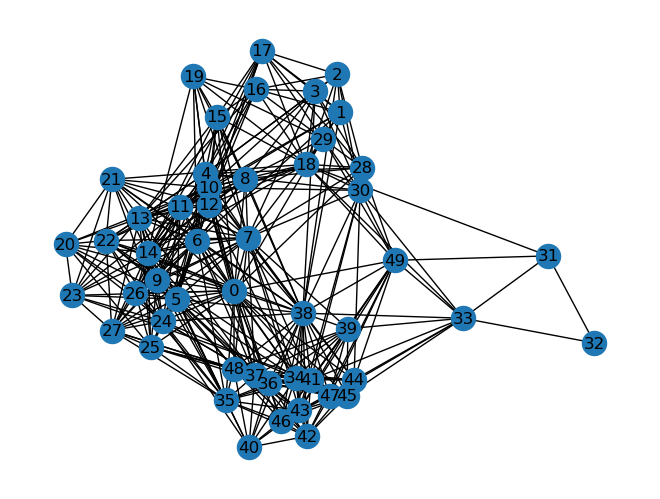

In [7]:

g=nx.from_numpy_matrix(structual_min_matrix)
#去除图中的自环
g.remove_edges_from(nx.selfloop_edges(g))
degree=nx.degree(g)
# print(degree)
edges=g.edges()
print(len(edges))
print(edges)
# nx.draw(g,pos=nx.spring_layout(g),with_labels=True)
nx.draw_spring(g,with_labels=True)
# nx.draw_spring  (g,with_labels=True,width=4,edge_color='r',node_color='b')
# nx.draw_networkx_edges(g,pos=nx.spring_layout(g),edgelist=edges,width=4,edge_color='r')
#将边信息以matrix形式保存


In [5]:
g=nx.from_numpy_matrix(structual_matrix)
#计算网络属性
#计算网络的度中心度
degree_centrality=nx.degree_centrality(g)



In [9]:
#计算网络的介数中心度
betweenness_centrality=nx.betweenness_centrality(g)
#

In [7]:
#计算聚类系数
print("聚类系数")
clustering=nx.clustering(g)
#计算节点的效率
# efficiency=nx.efficiency(g)
#计算节点的紧密中心度
print("紧密中心度")
closeness_centrality=nx.closeness_centrality(g)


In [10]:
#可视化度中心度
fix_dic_degree={}
for i in fix_rsult_anti_index:
    fix_dic_degree[i]=degree_centrality[i]
fix_dic_betweenness={}
for i in fix_rsult_anti_index:
    fix_dic_betweenness[i]=betweenness_centrality[i]

print("全局度中心度",np.mean(list(degree_centrality.values())))
print("全局介数中心度",np.mean(list(betweenness_centrality.values())))
print("枢纽节点的平均度中心度",np.mean(list(fix_dic_degree.values())))
print("枢纽节点的平均介数中心度",np.mean(list(fix_dic_betweenness.values())))


全局度中心度 0.004662605333597054
全局介数中心度 0.00043920902231478324
枢纽节点的平均度中心度 0.005719956694334176
枢纽节点的平均介数中心度 0.0005673306975204423


In [ ]:
全局度中心度 0.004662605333597054
全局介数中心度 0.00043920902231478324
枢纽节点的平均度中心度 0.005896788163118006
枢纽节点的平均介数中心度 0.0005774586531337619
枢纽节点的平均度 32.68
整体网络的平均度 25.840158758794875

In [11]:
g.number_of_edges()
print(structual_matrix.shape)
print(len(np.where(structual_matrix==0)[0]))

(5543, 5543)
30582354


In [12]:
degree=g.degree()
degrees=[d[1]for d in degree]
degree_list=[]
for i in fix_rsult_anti_index:
    degree_list.append(degree[i])
print("枢纽节点的平均度",np.mean(degree_list))
print("整体网络的平均度",np.mean(degrees))
# print(degree)

枢纽节点的平均度 31.7
整体网络的平均度 25.840158758794875


In [1]:
import pandas as pd

In [ ]:



data=pd.read_csv("../new_result/fix_group_10_result_others.csv",index_col=0)
data

In [3]:
#将数据保留三位有效数字
def get_3_float(num):
    return float('%.3g' % num)

#第二列以后，保留三位有效数字
for i in range(1,len(data.columns)):
    data.iloc[:,i]=data.iloc[:,i].apply(get_3_float)

data.to_csv("../new_result/fix_group_10_result_others_保留.csv")
# data.to_csv("../new_result/fix_group_10_result_1.csv",index=False)

In [22]:
#统计有多少个节点在gyri上
gyri_index=[]
sul_data=sio.loadmat("../matlab/sulc_data.mat")["sulc_data"]["val"][0][0]
print(sul_data.shape)

(64984, 1)


In [27]:
fix_rsult_anti_index
gyri_index=[]

for i in fix_rsult_anti_index:
    if sul_data[i]>-0.1:
        gyri_index.append(i)
print(len(gyri_index))

28


In [7]:
import scipy.io as sio
keys=os.listdir("../matfile/distance_4/")
keys=[int(i[:6])for i in keys if i.endswith("keys.mat")]
# keys=
sio.savemat("../matfile/subjs.mat",{"subjs":keys})

In [35]:
import numpy as np
dicT_leaning_result=[]
dict_result_path="../dic_result/"
end_str="_code_unt_200.txt"
key_test="114621"
dic_subs=os.listdir(dict_result_path)
dic_subs=[dic_subs[i][:6] for i in range(len(dic_subs)) if dic_subs[i].endswith(end_str)]
def get_dict_result(path):

    data=np.loadtxt(path)
    return data
# d=get_dict_result(dict_result_path+key_test+end_str)
for sub in dic_subs:
    data=get_dict_result(dict_result_path+sub+end_str)
    data_hub=data[:,fix_result_anti_index]
    data_hub[data_hub>0]=1
    sio.savemat("../dic_result/mat/"+sub+".mat",{"hubs":data_hub})

In [28]:
# fix_resul
d_min=d[:,fix_result_anti_index]

In [30]:
d_min
print(len(np.where(d_min>0)[0]))
#将非0元素设为1
d_min[d_min>0]=1
sio.savemat("../dic_result/"+key_test+"_hub.mat",{"hubs":d_min})


525


In [1]:
#求字典学习得到的矩阵的相关系数
import scipy.io as sio
import numpy as np
import os

In [3]:
dic_subs=os.listdir("../dic_result/mat/")
dic_subs=[dic_subs[i][:6] for i in range(len(dic_subs)) if dic_subs[i].endswith(".mat")]


In [19]:
data_test=sio.loadmat("../dic_result/mat/"+dic_subs[0]+".mat")["hubs"]
#求列相关系数
def get_corr(data):
    corr=np.corrcoef(data)
    return corr
# print(data_test.dtype)

# print(get_corr(data_test).shape)
# print(get_corr(data_test))
index_1=sio.loadmat("../matfile/surfaces/114621INDEX.mat")["INDEX"][0][0][0][1:]
index_1

array([    1,     2,     3, ..., 64912, 64942, 64960], dtype=uint16)

In [26]:
index_file="../matfile/surfaces/"

dict_result_path="../dic_result/mat/"
for sub in dic_subs:
    # data=sio.loadmat(dict_result_path+sub)["hubs"]
    data=np.loadtxt("../dic_result/"+sub[:6]+"_code_unt_200.txt")
    print(data.shape)
    index=sio.loadmat(index_file+sub[:6]+"INDEX.mat")["INDEX"][0][0][0][1:]
    data_index=data[:,[i-1 for i in index]]
    data_index[data_index>0]=1

    sio.savemat("../dic_result/oringin_mat/"+sub+"_01.mat",{"dic_1":data_index})
    


(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)
(200, 64984)


In [6]:
import numpy as np
import scipy.io as sio
# import cupy as cp

In [2]:
dic_result="../dic_result/114621_code_unt_200.txt"
data=np.loadtxt(dic_result)
# sio.savemat("../dic_result/mat/114621_net.mat",{"dic":data})
data[data>0]=1
sio.savemat("../dic_result/mat/114621_net_01.mat",{"dic":data})

In [19]:
#根据结果计算周围的点
from tqdm import tqdm,trange
result_dic={}
distance_dic={}
surface_mat="../matfile/surfaces/114823surface.mat"
fix_index_path="../graph_file/fix_index.txt"
fix_indexs=np.loadtxt(fix_index_path).astype(int)
surface_data=sio.loadmat(surface_mat)["surface"][0][0][0].T
print(surface_data)

def get_distance(data1,data2):
    return np.linalg.norm(data1-data2)
    # return np.sqrt(np.sum(np.square(data1-data2)))

for i in tqdm(range(surface_data.shape[0])):
    temp_distance=[]
    for j in fix_indexs:
        temp_distance.append(get_distance(surface_data[j-1],surface_data[i]))
    min_ind=np.argsort(temp_distance)[0]
    min_index=fix_indexs[min_ind]
    
    # if j not in result_dic:
    #     result_dic[j]=[]
    #     distance_dic[j]=[]
    # result_dic[j].append(np.argsort(temp_distance)[0]+1)
    # distance_dic[j].append(np.sort(temp_distance)[0])
    if min_index not in result_dic:
        result_dic[min_index]=[]
        distance_dic[min_index]=[]
    result_dic[min_index].append(i+1)
    distance_dic[min_index].append(temp_distance[min_ind])
    # print(result_dic)
    # print(distance_dic)
# print(result_dic)
sio.savemat("../graph_file/114823_result_dic.mat",{"result_dic":result_dic})
sio.savemat("../graph_file/114823_dic_distance.mat",{"distance":distance_dic})
np.save("../graph_file/114823_dic_index.npy",result_dic)
np.save("../graph_file/114823_dic_distance.npy",distance_dic)



# for i in tqdm(fix_indexs):
#     temp_distance=[]
#     for j in range(surface_data.shape[0]):
#         temp_distance.append(get_distance(surface_data[i-1],surface_data[j]))
#     #求出distance中最小的点作为index
    
#     if i not in result_dic:
#         result_dic[i]=[]
#         distance_dic[i]=[]
#     #找到距离最小的点

#     result_dic[i].append(np.argsort(temp_distance)[0]+1)
#     distance_dic[i].append(temp_distance[np.argsort(temp_distance)[0]])
#     print(result_dic)

[[ -4.433601 208.895767  29.256683]
 [-17.426781 213.404022  53.761658]
 [-44.647293 243.404427  34.325806]
 ...
 [ 59.654236 218.157768 -10.714363]
 [ 61.108601 216.760864 -10.001419]
 [ 58.99995  216.568787  -9.830242]]


100%|██████████| 64984/64984 [44:01<00:00, 24.61it/s]  


In [11]:
dic_result_matrix=np.loadtxt("../dic_result/114823_code_unt_200.txt")
# sio.savemat("../dic_result/all_index_mat/114823.mat",{"dic_result":dic_result_matrix})

In [4]:
hub_result_path="../new_result/fix_gtoup_10_result.txt"
hubs=np.loadtxt(hub_result_path)
hubs=hubs.astype(int)
count=0
for i in hubs:
    if i<30000:
        count+=1
print(count)
# print(dic_result_matrix.shape)

30


In [5]:
hub_dic_result=np.zeros((200,50))
for row,hub in enumerate(hubs):
    # col=np.zeros((1,200))
    col=np.mean(dic_result_matrix[:,[i-1 for i in result_dic[hub]]],axis=1)
    hub_dic_result[:,row]=col
print(hub_dic_result)
sio.savemat("../dic_result/hub_dic_result.mat",{"hub_dic_result":hub_dic_result})
hub1=hub_dic_result.copy()
hub1[hub1>0]=1
sio.savemat("../dic_result/hub_dic_result_01.mat",{"hub_dic_result":hub1})



NameError: name 'dic_result_matrix' is not defined

In [15]:
len(fix_indexs)

NameError: name 'fix_indexs' is not defined

In [45]:
def get_around_fix_result(key):
    dic_orin_result=np.loadtxt("../dic_result/"+key+"_code_unt_200.txt")
    dic_fix_index_result=np.zeros((200,len(fix_indexs)))
    for row,fix_index in enumerate(fix_indexs):
        dic_fix_index_result[:,row]=np.mean(dic_orin_result[:,[i-1 for i in result_dic[fix_index]]],axis=1)
    # sio.savemat("../dic_result/dic_around_fix_index_result/"+key+".mat",{"dic_fix_index_result":dic_fix_index_result})
    dic_fix_index_result[dic_fix_index_result>1]=1
    sio.savemat("../dic_result/dic_around_fix_index_result/"+key+"_01_1.mat",{"dic_fix_index_result":dic_fix_index_result})
get_around_fix_result("114823")

In [48]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Oct 24 15:56:47 2022',
 '__version__': '1.0',
 '__globals__': [],
 'dic_fix_index_result': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.23220278],
        [0.        , 0.        , 0.        , ..., 2.13943   , 0.4659225 ,
         0.06982222],
        [0.        , 0.        , 0.        , ..., 0.029864  , 0.005111  ,
         0.26641683],
        ...,
        [0.        , 0.05487875, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.40725493, 0.        , 0.        , ..., 0.148178  , 1.7266975 ,
         1.02568278]])}

In [49]:
data=sio.loadmat("../dic_result/dic_around_fix_index_result/114823.mat")["dic_fix_index_result"]
data[data>1]=1
data[data<1]=0
sio.savemat("../dic_result/dic_around_fix_index_result/114823_01_1.mat",{"dic_fix_index_result":data})

In [50]:
hub_data=sio.loadmat("../dic_result/hub_dic_result.mat")["hub_dic_result"]
hub_data[hub_data>1]=1
hub_data[hub_data<1]=0
sio.savemat("../dic_result/hub_dic_result_01_1.mat",{"hub_dic_result":hub_data})



In [11]:
import scipy.io as sio
import numpy as np
def set_threshold(file):
    fix_indexs=np.loadtxt(fix_index_path).astype(int)
    fix_indexs=list(fix_indexs)
    # threshold
    # all_data=sio.loadmat("../dic_result/dic_result_1024/"+file)["dic_fix_index_result"]
    all_data=np.loadtxt("../dic_result/last_result/"+file)
    #去除行值总和最小的一百个网络
    # all_data=np.delete(all_data,np.argsort(np.sum(all_data,axis=1))[:100],axis=0)
    print(all_data.shape)
    # all_data[all_data>threshold]=1
    # all_data[all_data<1]=0
    #对行做归一化处理
    all_data=all_data/np.sum(all_data,axis=1).reshape(-1,1)
    print(all_data.shape)
    print(sum(all_data[0]))
    hub_result_path="../new_result/fix_gtoup_10_result.txt"
    hubs=np.loadtxt(hub_result_path)
    hubs=hubs.astype(int)
    # hub_data=sio.loadmat(". ./dic_result/hub_dic_result.mat")["hub_dic_result"]
    # hub_data[hub_data>1]=1
    # hub_data[hub_data<1]=0
    #对行做归一化处理
    # hub_index=[]
    # for i in hubs:
    #     hub_index.append(fix_indexs.index(i))
    hub_data=all_data[:,hubs]
    # hub_data=hub_data/np.sum(hub_data,axis=1).reshape(-1,1)
    # sio.savemat("../dic_result/dic_around_fix_index_result/114823_normalize.mat",{"dic_fix_index_result":all_data})
    # sio.savemat("../dic_result/hub_result/hub_dic_result_normalize.mat",{"hub_dic_result":hub_data})
    sio.savemat("../dic_result/last_result/"+file[:-4]+"_normalize.mat",{"dic_fix_index_result":all_data})
    sio.savemat("../dic_result/last_result/hub_"+file[:-4]+"_normalize.mat",{"hub_dic_result":hub_data})
# set_threshold(0.3)
# files=os.listdir("../dic_result/dic_result_1024/")
# files=[i for i in files if  "code"in i]
# for file in files:
#     set_threshold(file)

set_threshold("Lamda20_Dsize300_114621_code_unt_300.txt")



(300, 64984)
(300, 64984)
0.9999999999999998


In [14]:
fix_indexs=np.loadtxt(fix_index_path).astype(int)
fix_indexs=list(fix_indexs)
# fix_indexs
hubs=np.loadtxt(hub_result_path)
hubs=hubs.astype(int)
hubs

array([42693, 17812, 11852, 14221, 18611, 23180, 12914, 23294, 43142,
       45433, 45249, 45126,  6146, 46605, 15197, 22295, 45727, 54342,
       11776, 46016, 14450, 46103, 23090, 45919, 46022, 22492, 37375,
       45895, 46219, 11983,  1094, 43781, 22641, 43554, 29510,  3461,
       13729, 46596, 25699, 23163, 15243, 18496, 44487, 16780, 28936,
       18369,  6159, 13159, 13406, 60324])

In [ ]:
hub_result_path

In [ ]:
fix_index_path="../graph_file/fix_index.txt"
fix_indexs=np.loadtxt(fix_index_path).astype(int)
fix_indexs=list(fix_indexs)
fix_indexs
hub_index=np.loadtxt(hub_result_path).astype(int)
sio.savemat("../new_result/hub_index.mat",{"hub_index":hub_index})
hub_index_new=[]
for hub in hub_index:
    hub_index_new.append(fix_indexs.index(hub)+1)
sio.savemat("../new_result/hub_index.mat",{"hub_index":hub_index_new})


In [11]:
def get_dic_result_and_save():
    dic_result_path="../dic_result/dic_resul_1024/"
    


In [16]:
hub_result_path="../new_result/fix_gtoup_10_result.txt"
hub_new=np.loadtxt(hub_result_path)
sio.savemat("../new_result/hub_index_new.mat",{"hub_index":hub_new})